<center><h1><b>Euler's Identity</h1></b>

Dr. Bingsen Wang

6/14/2023
</center>

#Euler's Identity

The Euler's identity is described by
$$e^{j\theta} = \cos\theta + j\sin\theta \tag{1}$$

#Python Code
The Python code illustrates the rms value of ac waveform.

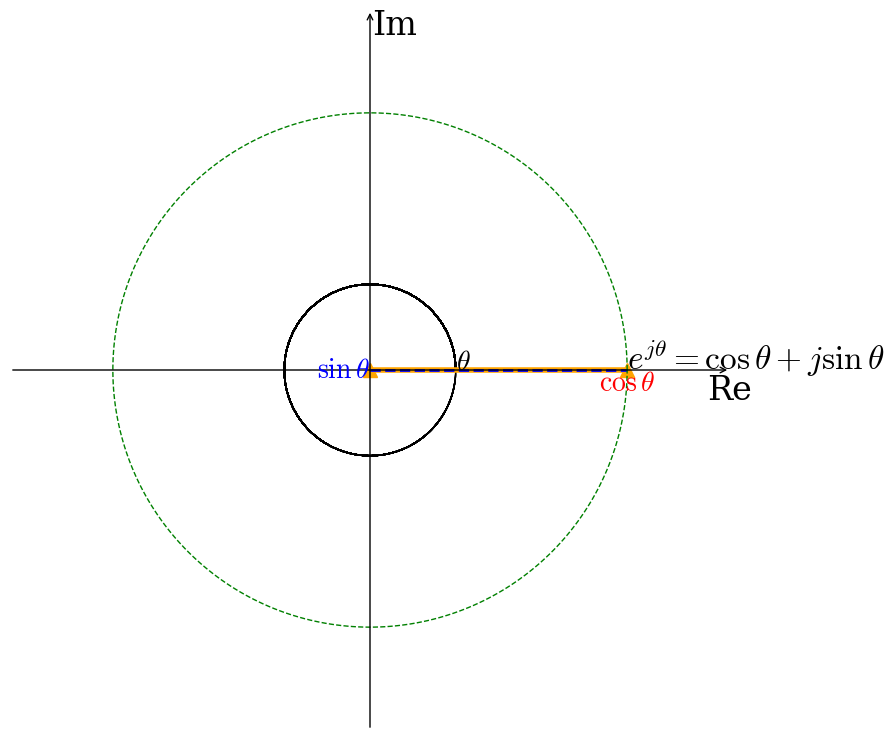

In [19]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#parameters
Nf = 300
theta=linspace(0,2*pi,Nf)
z = 1.5*exp(1j*theta)

fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax=fig.add_axes((.1,.1,.8,.8),xlim=[-2.1,2.1], ylim=[-2.1,2.1],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax.annotate("", (2.1, 0), (-2.1, 0),arrowprops={'arrowstyle':"->"}) #x-axis
ax.annotate("", (0,2.1), (0,-2.1),arrowprops={'arrowstyle':"->"}) #y-axis
ax.text(2.1,-.03,'Re',size=24,va='top',ha='center') #x-axis label
ax.text(0.01,2.1,'Im',size=24,va='top') #y label
tcos = ax.text(z[0].real,0,r'$\cos\theta$', size = 20,va='top',ha='center',color='r')
tsin = ax.text(0,z[0].imag,r'$\sin\theta$', size = 20,va='center',ha='right',color='b')
tclx = ax.text(z[0].real,z[0].imag,r'$e^{j\theta} = \cos\theta+j\sin\theta$', size = 24,color='k')
ttheta = ax.text(0.5*cos(theta[0]*.5),0.5*sin(theta[0]*.5),r'$\theta$', size = 20)

lines = [] #array containing all the line segments
lines.append(ax.plot([], [], '-^',markersize=10, lw=4, color='orange')[0]) #lines to plot
lines.append(ax.plot([], [], '--', lw=2, color='r')[0]) #real
lines.append(ax.plot([], [], '--', lw=2, color='b')[0]) #imag


# animation function. This is called sequentially
def animate(i):
  lines[0].set_data([0,z[i].real],[0,z[i].imag])
  lines[1].set_data([z[i].real,z[i].real],[0,z[i].imag])
  lines[2].set_data([0,z[i].real],[z[i].imag,z[i].imag])
  tcos.set_position((z[i].real,0))
  tsin.set_position((0,z[i].imag))
  tclx.set_position((z[i].real,z[i].imag))
  if theta[i]>pi/2 and theta[i]<3*pi/2:
    tsin.set_ha('left')
    tclx.set_ha('right')
  else:
    tsin.set_ha('right')
    tclx.set_ha('left')
  if theta[i]<pi:
    tcos.set_va('top')
  else:
    tcos.set_va('bottom')
  ttheta.set_position((0.5*cos(theta[i]/2),0.5*sin(theta[i]/2)))
  ax.add_patch(mp.Arc((0,0),1,1,theta1=0,theta2=theta[i]/pi*180))
  return
ax.plot(z.real,z.imag,lw=1,ls='--',color='g')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"EulerIdentity.mp4"
writervideo = animation.FFMpegWriter(fps=40)
anim.save(fn, writer=writervideo,dpi = 120)

#debug
